In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

100% 713M/715M [00:04<00:00, 210MB/s]
100% 715M/715M [00:04<00:00, 186MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.0/379.0 KB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 KB 7.1 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
filenames

['6000.png',
 '40692.png',
 '29381.png',
 '17029.png',
 '11850.png',
 '46592.png',
 '13629.png',
 '37193.png',
 '13381.png',
 '23882.png',
 '40518.png',
 '20158.png',
 '2349.png',
 '14193.png',
 '8447.png',
 '43783.png',
 '7617.png',
 '32964.png',
 '25494.png',
 '14245.png',
 '19835.png',
 '27384.png',
 '20800.png',
 '21342.png',
 '22251.png',
 '16358.png',
 '47101.png',
 '14841.png',
 '9436.png',
 '7377.png',
 '44216.png',
 '45231.png',
 '44874.png',
 '42932.png',
 '41232.png',
 '38797.png',
 '3607.png',
 '6491.png',
 '12817.png',
 '34541.png',
 '49737.png',
 '24416.png',
 '12647.png',
 '14971.png',
 '9043.png',
 '49879.png',
 '45091.png',
 '27979.png',
 '5597.png',
 '42511.png',
 '7808.png',
 '45254.png',
 '542.png',
 '19672.png',
 '38281.png',
 '4945.png',
 '48871.png',
 '19870.png',
 '11010.png',
 '20551.png',
 '4659.png',
 '16002.png',
 '27307.png',
 '49963.png',
 '4022.png',
 '10066.png',
 '11883.png',
 '31893.png',
 '47004.png',
 '31517.png',
 '38112.png',
 '26416.png',
 '11974.

In [ ]:
len(filenames)

50000

In [ ]:
labels = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels.shape

(50000, 2)

In [ ]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels['new_label'] = [labels_dictionary[i] for i in labels['label']] 

In [ ]:
labels.head()

,id,label,new_label
0,1,frog,6
1,2,truck,9
2,3,truck,9
3,4,deer,4
4,5,automobile,1


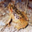

(32, 32, 3)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)
img.shape

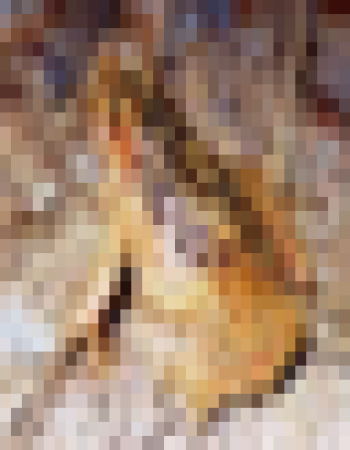

In [ ]:
width = 350
height = 450
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

cv2_imshow(resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
train_data_folder = '/content/train/'

data = []

for id in range(1,50001):

  image = cv2.imread(train_data_folder + str(id) + '.png')
  data.append(image)

In [ ]:
len(data)

50000

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
type(data)

list

In [ ]:
X = np.array(data)
Y = np.array(labels['new_label'])

In [ ]:
X.shape

(50000, 32, 32, 3)

In [ ]:
Y.shape

(50000,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9684 - acc: 0.3596 - val_loss: 1.6419 - val_acc: 0.4210
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.5887 - acc: 0.4469 - val_loss: 1.5361 - val_acc: 0.4532
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.5048 - acc: 0.4691 - val_loss: 1.5198 - val_acc: 0.4733
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.4541 - acc: 0.4910 - val_loss: 1.4749 - val_acc: 0.4800
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.4136 - acc: 0.5010 - val_loss: 1.4463 - val_acc: 0.4885
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.3831 - acc: 0.5116 - val_loss: 1.4175 - val_acc: 0.4935
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.3510 - acc: 0.5249 - val_loss: 1.4341 - val_acc: 0.4938
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 582s 488ms/step - loss: 2.0414 - acc: 0.2535 - val_loss: 1.6589 - val_acc: 0.3697
Epoch 2/10
1125/1125 [==============================] - 549s 488ms/step - loss: 1.4693 - acc: 0.4669 - val_loss: 1.5091 - val_acc: 0.5115
Epoch 3/10
1125/1125 [==============================] - 551s 490ms/step - loss: 1.2098 - acc: 0.5791 - val_loss: 1.1532 - val_acc: 0.5832
Epoch 4/10
1125/1125 [==============================] - 550s 489ms/step - loss: 1.0616 - acc: 0.6370 - val_loss: 0.9361 - val_acc: 0.6690
Epoch 5/10
1125/1125 [==============================] - 550s 489ms/step - loss: 0.9530 - acc: 0.6813 - val_loss: 0.8094 - val_acc: 0.7092
Epoch 6/10
1125/1125 [==============================] - 550s 489ms/step - loss: 0.8637 - acc: 0.7118 - val_loss: 0.8284 - val_acc: 0.7147
Epoch 7/10
1125/1125 [==============================] - 550s 489ms/step - loss: 0.7873 - acc: 0.7394 - val_loss: 0.9064 - val_acc: 0.7045
Epoch 8/10
1125/1125 [============

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 61s 191ms/step - loss: 0.7120 - acc: 0.7715
Test Accuracy = 0.7714999914169312


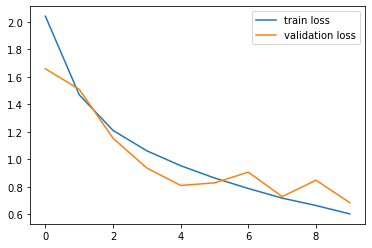

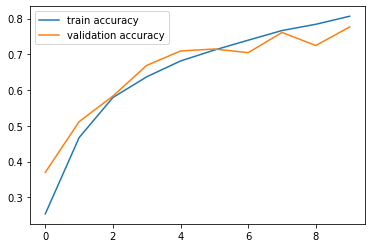

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()